# Predict a car's market price using its attributes

Using fundamental machine learning k nearest neighbor regression technique.

Date May 15, 2018

Reference --> http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

About the Data --> http://archive.ics.uci.edu/ml/datasets/Automobile

In [1]:
import pandas as pd
#df = pd.read_csv('imports-85.csv')
df = pd.read_table('imports-85.data', sep=",")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null object
std            204 non-null object
two            204 non-null object
convertible    204 non-null object
rwd            204 non-null object
front          204 non-null object
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 n

In [2]:
df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    204 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-ratio    204 non-null float64
horsepower           204 non-nul

In [4]:
df.shape

(204, 26)

In [5]:
#replace cells with ? with Nan
import numpy 
df.replace('?',numpy.nan,inplace=True)

# Convert and clean up 
convert numbered columns to numeric

In [6]:

df['symboling'] = df['symboling'].astype(int)

In [7]:

df['symboling_n'] = (max(df['symboling']) - df['symboling'])/max(df['symboling'])

In [8]:
df['symboling_n']

0      0.000000
1      0.666667
2      0.333333
3      0.333333
4      0.333333
5      0.666667
6      0.666667
7      0.666667
8      1.000000
9      0.333333
10     1.000000
11     1.000000
12     1.000000
13     0.666667
14     1.000000
15     1.000000
16     1.000000
17     0.333333
18     0.666667
19     1.000000
20     0.666667
21     0.666667
22     0.666667
23     0.666667
24     0.666667
25     0.666667
26     0.666667
27     1.333333
28     0.000000
29     0.333333
         ...   
174    1.333333
175    1.333333
176    1.333333
177    0.000000
178    0.000000
179    1.333333
180    1.333333
181    0.333333
182    0.333333
183    0.333333
184    0.333333
185    0.333333
186    0.333333
187    0.333333
188    0.000000
189    0.000000
190    1.000000
191    1.000000
192    1.000000
193    1.666667
194    1.333333
195    1.666667
196    1.333333
197    1.666667
198    1.333333
199    1.333333
200    1.333333
201    1.333333
202    1.333333
203    1.333333
Name: symboling_n, Lengt

In [9]:
df['wheel-base'] = df['wheel-base'].astype(float)

In [10]:
df['wheel-base_n'] = (max(df['wheel-base']) - df['wheel-base'])/max(df['wheel-base'])

In [11]:
df['length'] = df['length'].astype(float)

In [12]:
df['length_n'] = (max(df['length']) - df['length'])/max(df['length'])

In [13]:
df['width'] = df['width'].astype(float)

In [14]:
def normit(col):
    newcol = col+'_n'
    df[newcol] = (max(df[col]) - df[col])/max(df[col])
    return

In [15]:
df['height'] = df['height'].astype(float)

In [16]:
normit('height')

In [17]:
df['curb-weight'] = df['curb-weight'].astype(int)

In [18]:
normit('curb-weight')

In [19]:
df['engine-size'] = df['engine-size'].astype(int)

In [20]:
normit('engine-size')

In [21]:
# 3.21 factor for this size engine
df['bore'].fillna(3.21,inplace=True)

In [22]:
df['bore'] = df['bore'].astype(float)

In [23]:
normit('bore')

In [24]:
df['stroke'] = df['stroke'].astype(float)

In [25]:
normit('stroke')

In [26]:
df['compression-ratio'] = df['compression-ratio'].astype(int)

In [27]:
normit('compression-ratio')

In [28]:
# 111 factor for this size engine
df['horsepower'].fillna(111,inplace=True)

In [29]:
df['horsepower'] = df['horsepower'].astype(int)

In [30]:
normit('horsepower')

In [31]:
df['highway-mpg'] = df['highway-mpg'].astype(int)

In [32]:
normit('highway-mpg')

In [33]:
# 25000 factor for this size car
df['price'].fillna(25000,inplace=True)
df['price'] = df['price'].astype(int)

In [34]:
normit('price')

# Normalize loss column 

Using rough ratio wheel base to loss = 1.24 based on data


In [35]:
# fill in Nans in normalized losses with wheel-base ratio 1.24 factor
df['normalized-losses'].fillna(1.24*df['wheel-base'],inplace=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 38 columns):
symboling              204 non-null int64
normalized-losses      204 non-null object
make                   204 non-null object
fuel-type              204 non-null object
aspiration             204 non-null object
num-of-doors           202 non-null object
body-style             204 non-null object
drive-wheels           204 non-null object
engine-location        204 non-null object
wheel-base             204 non-null float64
length                 204 non-null float64
width                  204 non-null float64
height                 204 non-null float64
curb-weight            204 non-null int64
engine-type            204 non-null object
num-of-cylinders       204 non-null object
engine-size            204 non-null int64
fuel-system            204 non-null object
bore                   204 non-null float64
stroke                 200 non-null float64
compression-ratio      204 non-n

# Train 
Using K Nearest Neighbor Regressor

In [44]:
# Store the numeric features in a list
numcolumns = ['symboling_n','wheel-base_n',
                   'length_n',
                   'height_n',
                   'curb-weight_n', 
                   'engine-size_n', 
                   'bore_n',
                   'stroke_n', 
                   'compression-ratio_n',
                   'horsepower_n',
                   'highway-mpg_n']  

In [45]:
numcolumns

['symboling_n',
 'wheel-base_n',
 'length_n',
 'height_n',
 'curb-weight_n',
 'engine-size_n',
 'bore_n',
 'stroke_n',
 'compression-ratio_n',
 'horsepower_n',
 'highway-mpg_n']

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
    
def knn_train_test(thecols,targ,dfn,k1):
# nearest neighbors regression loop through hyper_params 
# setting the iterator as the hyper_param
    train_df = dfn.iloc[0:180]
    test_df = dfn.iloc[180:]

    knn = KNeighborsRegressor(n_neighbors=k1, algorithm='brute', metric='euclidean')
    
    knn.fit(train_df[thecols], train_df[targ])
    predictions = knn.predict(test_df[thecols])

    # performance using MSE and RMSE
    # RMSE is aka residual sum of squares
    y_true = test_df[targ].as_matrix()
    y_pred = predictions
    return mean_squared_error(y_true,y_pred)



[5119.8061527431555, 5549.372220500862, 5549.372220500862, 5549.372220500862, 5549.372220500862]


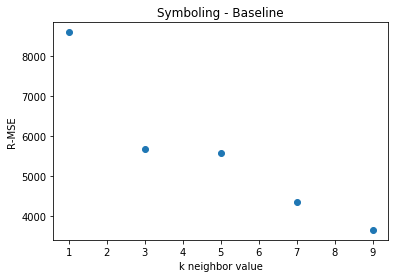

In [53]:
# Baseline using a manual nearest neighbor algo
import numpy as np

hyper_params = [x for x in (1,3,5,7,9)]

target = 'price'

def knn_predict_price(thecol2,targ,dfn,k1):
    train_df = dfn.iloc[0:180]
    test_df = dfn.iloc[180:]
    
    # train a model on the train split
    temp_df_train = train_df.copy()
    temp_df_train['distance'] = (k1 -  temp_df_train[thecol2]).apply(abs)
    temp_df_train = temp_df_train.sort_values('distance')
    mean_price_train = temp_df_train[targ][:5].mean()  
    
    # test the model on test split after training on the selected column 
    temp_df_test = test_df.copy()
    temp_df_test['distance'] = (k1 - temp_df_test[thecol2]).apply(abs)
    temp_df_test = temp_df_test.sort_values('distance')
    mean_price_test = temp_df_test[targ][:5].mean()
    
    # calculate mean of errors and square
    error = mean_price_test - test_df[targ]
    error = error**2
    mean_sqprice_test_error = np.mean(error)
    
    # return mean of the squared errors
    return(mean_sqprice_test_error)

rmse_values_m = []
for h in hyper_params:
    mse_m = knn_predict_price('symboling_n',target,df,h)
    rmse_values_m.append(mse_m**0.5)

print(rmse_values_m)    
plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title('Symboling - Baseline')
plt.show()


In [42]:
#set parameters again
hyper_params = [x for x in (1,3,5,7,9)]

cols = numcolumns
target = 'price'

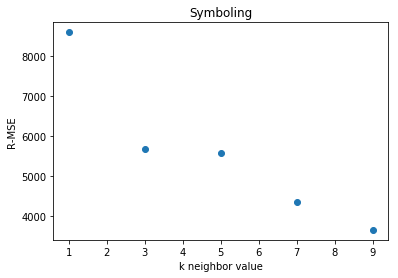

In [43]:
#Train and test each feature again successively using the sklearn Regressors library (note comparison to manual above)

rmse_values = []
for h in hyper_params:
    mse = knn_train_test(['symboling_n'],target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title('Symboling')
plt.show()

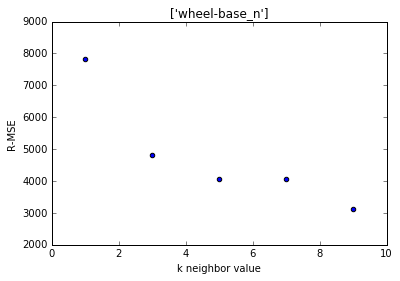

In [49]:
rmse_values = []
col = ['wheel-base_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

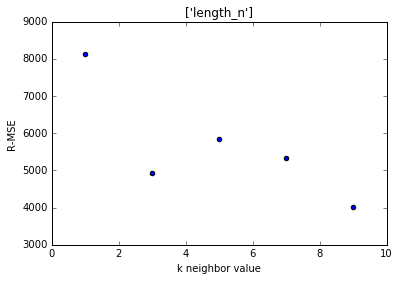

In [50]:
rmse_values = []
col = ['length_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

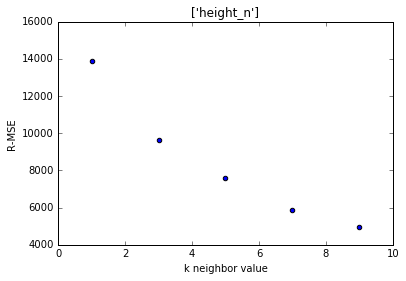

In [51]:
rmse_values = []
col = ['height_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

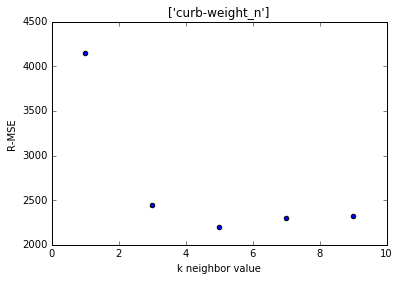

In [52]:
rmse_values = []
col = ['curb-weight_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

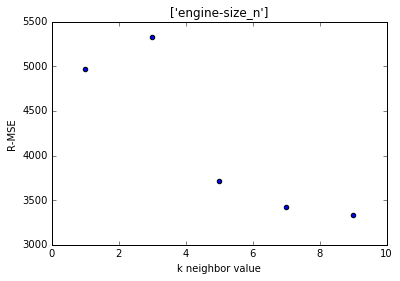

In [53]:
rmse_values = []
col = ['engine-size_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

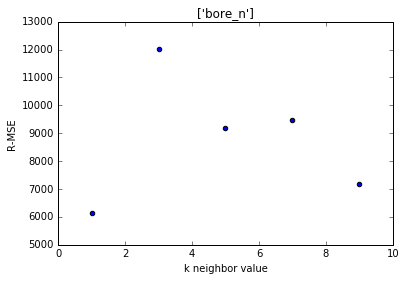

In [54]:
rmse_values = []
col = ['bore_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

In [58]:
# 3.15 factor for this size engine
df['stroke'].fillna(3.15,inplace=True)
normit('stroke')

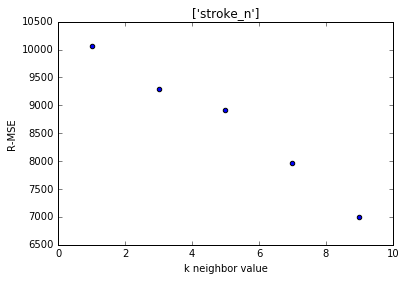

In [59]:
rmse_values = []
col = ['stroke_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

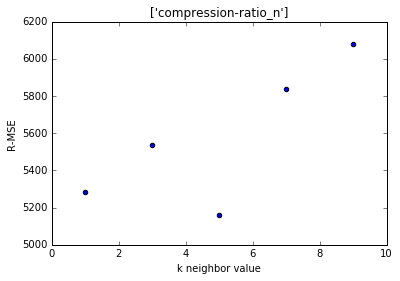

In [60]:
rmse_values = []
col = ['compression-ratio_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

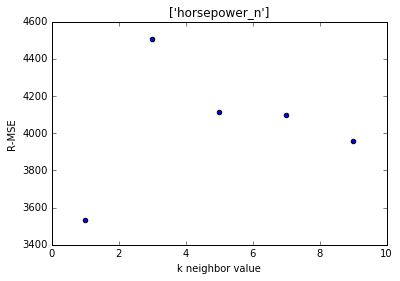

In [61]:
rmse_values = []
col = ['horsepower_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

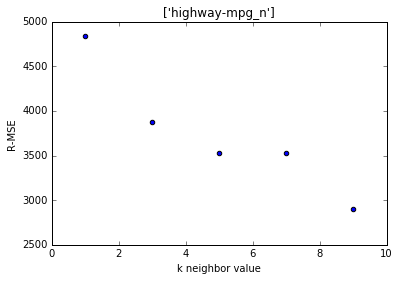

In [62]:
rmse_values = []
col = ['highway-mpg_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

[4581.3573179790292, 2812.6599279632746, 2624.4807699174835, 2852.8657824403604, 3007.3579564272723]


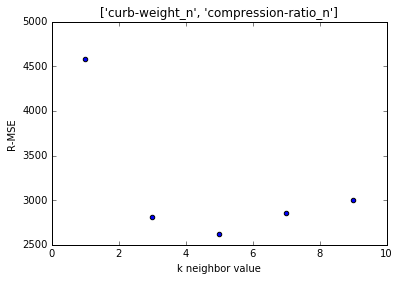

In [70]:
rmse_values = []
col = ['curb-weight_n','compression-ratio_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

print(rmse_values)
plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

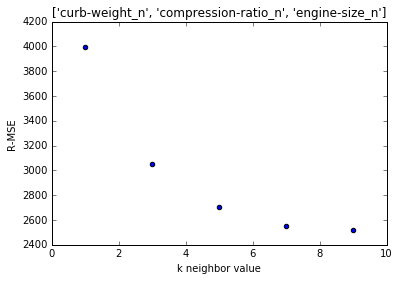

In [65]:
rmse_values = []
col = ['curb-weight_n','compression-ratio_n','engine-size_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

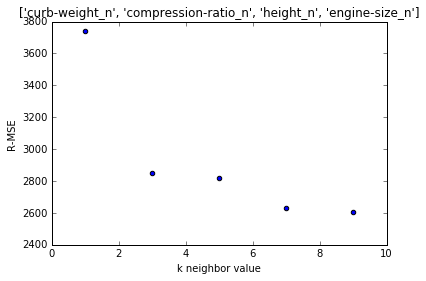

In [66]:
rmse_values = []
col = ['curb-weight_n','compression-ratio_n','height_n','engine-size_n']
for h in hyper_params:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

plt.scatter(hyper_params,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

# Top 3 models 

In the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.


[4581.3573179790292, 3000.9140517237965, 2812.6599279632746, 2858.1266660283795, 2624.4807699174835, 2761.6923352173299, 2852.8657824403604, 2869.5185575202549, 3007.3579564272723, 2976.7569109827118, 2955.7034402643699, 3117.9096885733456, 3451.2904791754263, 3853.0635300695085, 4146.2574349021652, 4017.4303405710903, 3780.9434890687958, 3733.0923720911078, 3648.8005119512486, 3566.7391470244456, 3555.2742007976185, 3472.3140507067528, 3308.9676096477842, 3294.1694079687209, 3224.8861328631951]


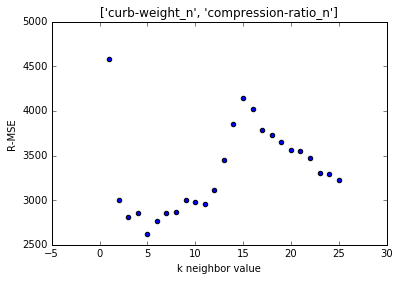

In [73]:
rmse_values = []
col = ['curb-weight_n','compression-ratio_n']
hyper_param2 = [x for x in (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25)]
for h in hyper_param2:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

print(rmse_values)
plt.scatter(hyper_param2,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

[3995.4514972236448, 3092.7670576551131, 3050.245454604159, 3027.0060032563529, 2701.6888748830179, 2631.8064703647387, 2552.7744475574104, 2499.1567669061733, 2517.5309559561588, 2569.8312189227527, 2626.8792337313139, 2985.6709337231332, 3267.6420302520628, 3596.1408702369317, 3989.8723729240041, 3939.1717848741628, 3696.1485309249401, 3525.541657593039, 3360.1858008834738, 3285.2867963657295, 3192.0409518820497, 3068.8032378414373, 2991.8356620874492, 2933.1144502112757, 2871.3070572708402]


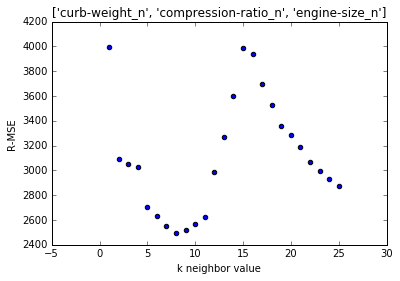

In [74]:
rmse_values = []
col = ['curb-weight_n','compression-ratio_n','engine-size_n']
hyper_param2 = [x for x in (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25)]
for h in hyper_param2:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

print(rmse_values)
plt.scatter(hyper_param2,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

[3741.0361087092792, 3323.0879981953531, 2853.103682022504, 2867.5414397797581, 2820.4590681305763, 2900.6151279289661, 2629.7907043735481, 2678.4089008652832, 2606.1093476864639, 2698.3398402227499, 2810.281701184736, 3049.724177675062, 3282.8190650049778, 3554.6833202748844, 3882.8575984227946, 3826.801127610363, 3588.899500583479, 3421.1829009675048, 3288.9394393884654, 3215.0078158115211, 3127.4445309275625, 3082.3667027302026, 2990.1843506464052, 3001.5401533742156, 2947.5905334357417]


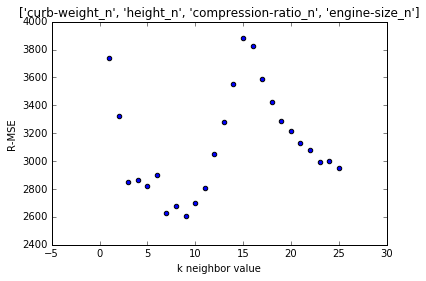

In [75]:
rmse_values = []
col = ['curb-weight_n','height_n','compression-ratio_n','engine-size_n']
hyper_param2 = [x for x in (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25)]
for h in hyper_param2:
    mse = knn_train_test(col,target,df,h)
    rmse_values.append(mse**0.5)

print(rmse_values)
plt.scatter(hyper_param2,rmse_values)
plt.xlabel('k neighbor value')
plt.ylabel('R-MSE')
plt.title(col)
plt.show()

# Conclusion

This analysis, based on a 80/20 train-test split, suggests that a car's curb weight, engine size and compression ratio - these 3 features - are most predictive of a car's price. More analysis might be needed to validate the model.